In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
# from small_script.myFunctions import *
sys.path.insert(0, "/Users/weilu/openmmawsem")
from helperFunctions.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [3]:
# pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
# pre = "/Users/weilu/Research/server/april_2019/optimization_test/gammas/"
pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/gammas/"
# pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
# pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
pp = f"protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"

A_name = pp + "_A"
B_name = pp + "_B"
B_filtered_name = pp + "_B_filtered"
P_name = pp + "_P"
Gamma_name = pp + "_gamma"
Gamma_filtered_name = pp + "_gamma_filtered"
Lamb_name = pp + "_lamb"
Lamb_filtered_name = pp + "_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})

half_B_name = pp + "_half_B"
half_B = np.loadtxt(pre+half_B_name)
other_half_B_name = pp + "_other_half_B"
other_half_B = np.loadtxt(pre+other_half_B_name)
std_half_B_name = pp + "_std_half_B"
std_half_B = np.loadtxt(pre+std_half_B_name)


# pre = "/Users/weilu/Research/server/april_2019/"
location = pre + "../../phis/protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_phi_decoy_summary.txt"
A_prime = np.loadtxt(location)





/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


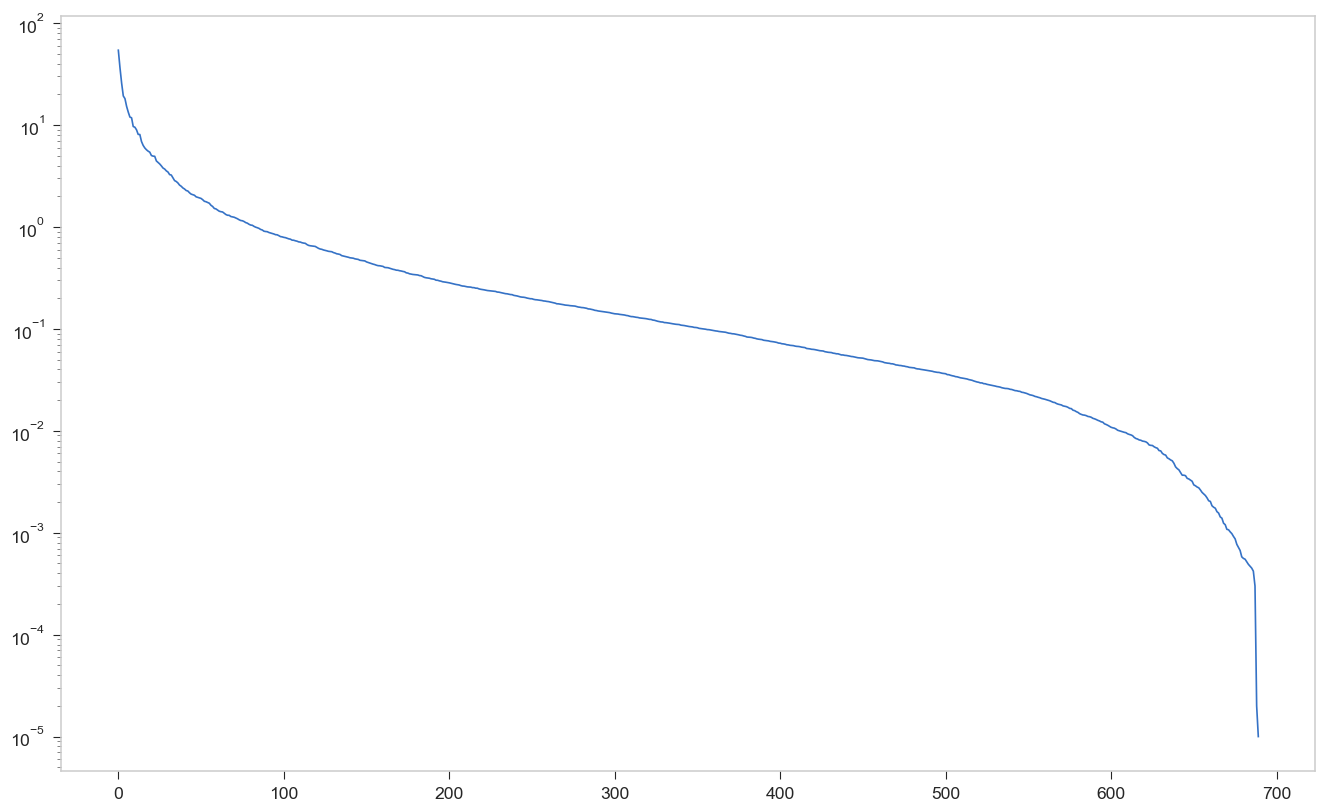

In [4]:
plt.plot(Lamb)
plt.yscale("log")

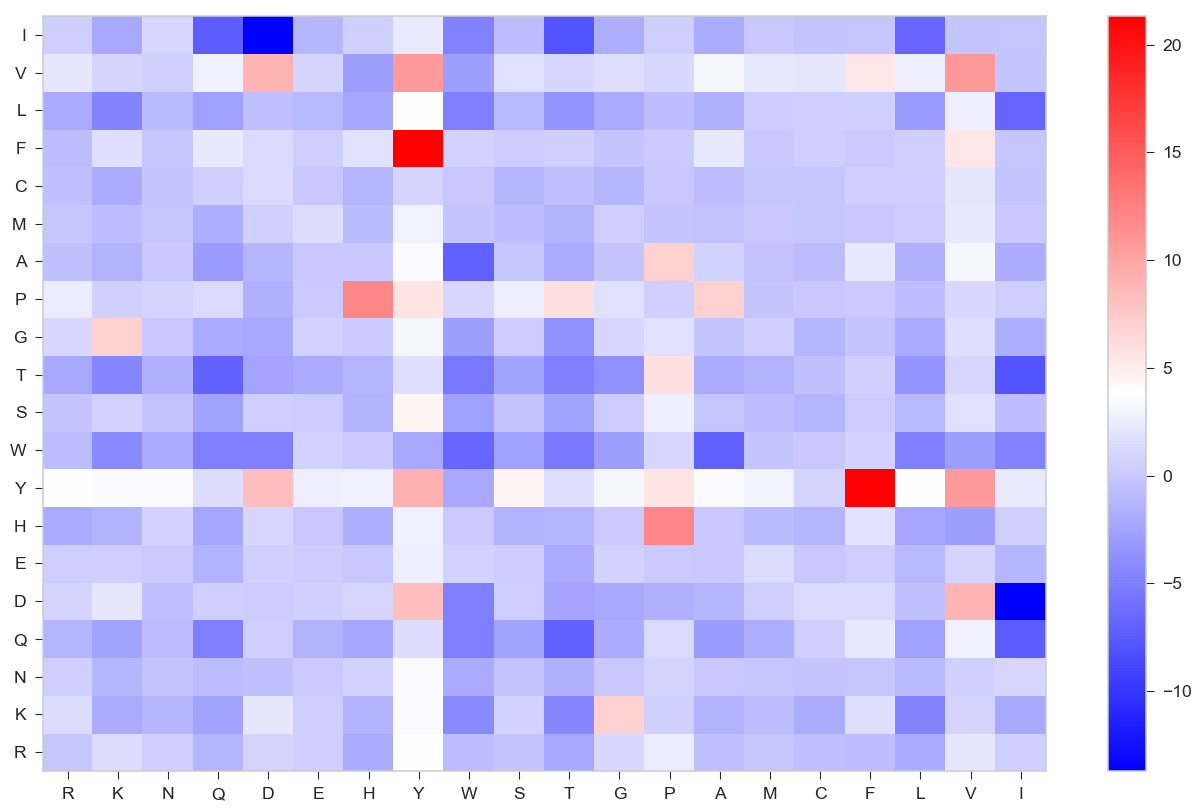

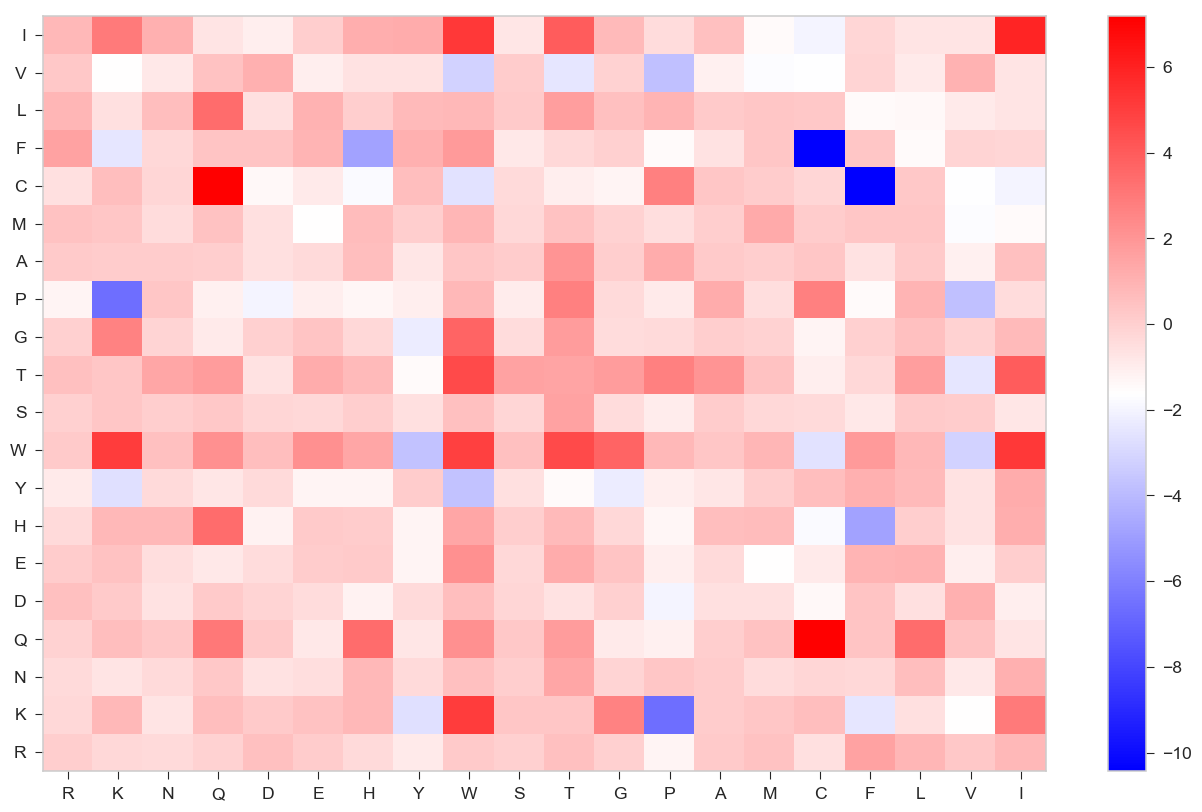

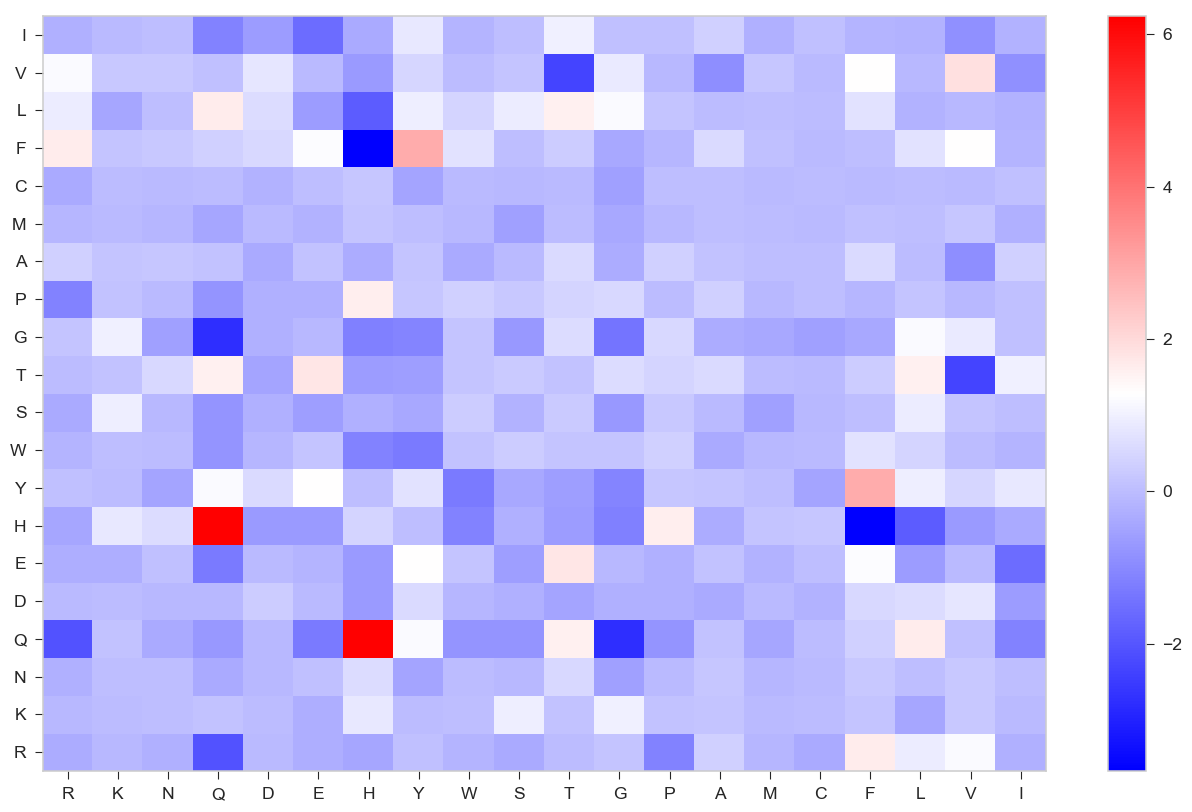

In [10]:
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
filtered_lamb = np.copy(lamb)
cutoff_mode = 400
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb, 
                                                                   cutoff_mode, P)
filtered_gamma = np.dot(filtered_B_inv, A)
filtered_B = np.linalg.inv(filtered_B_inv)
plot_contact_well(filtered_gamma[:210], inferBound=True)
plot_contact_well(filtered_gamma[210:420], inferBound=True)
plot_contact_well(filtered_gamma[420:], inferBound=True)

In [6]:
# maximum difference between loaded and computed is 1e-5.
max(lamb-Lamb)

(1.5403101476740844e-05+0j)

In [11]:
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/saved_gammas/"
np.savetxt(f"{save_gamma_pre}/trial_2_cutoff400", filtered_gamma)

In [107]:
os.chdir('/Users/weilu/opt/notebook/Optimization')

'/Users/weilu/opt/notebook/Optimization'

In [14]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
data = validate_hamiltonian_wei("phi_list.txt", "protein_list_small", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 3.8340531662409814
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2_1,3.834053,-1091.522839,-9.338132,282.256051
1,6BJ8_1,4.115412,-2110.009245,-812.790146,315.210016
2,2JCC_1,3.745693,-922.515254,149.727164,286.260117
3,1AO7_1,3.806062,-1753.590663,-575.699559,309.477634
4,1LP9_1,3.944508,-920.931994,163.036214,274.804438
5,3QDJ_1,4.085536,-1782.495837,-490.495793,316.237590
6,3GSN_1,3.709800,-1900.434238,-753.721660,309.103604
7,1QRN_1,4.164756,-1712.503201,-527.714693,284.479679
8,3PWP_1,3.889196,-1460.943615,-319.651538,293.451918
9,5W1W_1,3.914030,-700.985851,428.268456,288.514471


In [15]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_2_cutoff400"
data = validate_hamiltonian_wei("phi_list.txt", "protein_list_small", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 22.100828450470825
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2_1,22.100828,-425.944208,-19.039485,18.411288
1,6BJ8_1,18.234455,-583.705104,-187.090418,21.750838
2,2JCC_1,23.091225,-609.090184,-224.970073,16.634896
3,1AO7_1,21.665218,-552.214494,-167.905076,17.738544
4,1LP9_1,22.983383,-523.716471,-155.334523,16.028187
5,3QDJ_1,19.865607,-580.766858,-163.052759,21.026999
6,3GSN_1,22.184385,-410.258265,-61.283660,15.730641
7,1QRN_1,27.800921,-614.034462,-215.165011,14.347347
8,3PWP_1,27.572172,-611.500391,-211.485674,14.507915
9,5W1W_1,20.096043,-445.859601,-37.667697,20.312054


In [16]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/original_gamma"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_small", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 0.9003155450024992
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2_1,0.900316,-565.363569,-558.334725,7.807089
1,6BJ8_1,0.340620,-559.377083,-556.341055,8.913235
2,2JCC_1,0.151485,-578.632012,-577.373781,8.305978
3,1AO7_1,0.549733,-554.882868,-549.744350,9.347298
4,1LP9_1,0.018086,-572.456799,-572.294553,8.970942
5,3QDJ_1,0.571400,-548.835394,-544.666126,7.296581
6,3GSN_1,0.721878,-546.292261,-539.487997,9.425782
7,1QRN_1,0.039428,-555.365484,-555.071793,7.448888
8,3PWP_1,0.253560,-570.922191,-568.716016,8.700786
9,5W1W_1,0.751747,-563.412353,-557.502728,7.861194


In [17]:
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/original_gamma"
original_gamma = np.loadtxt(gamma_file_name)

In [18]:
np.dot(A_prime, original_gamma)

-559.5053481482374

In [19]:
# we want to impose additional contraint so that A' * gamma = constnat.(-562.23)
c = np.dot(A_prime, original_gamma)
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
gamma_new = B_inv.dot(A-A_prime*lambda_2)

In [20]:
np.dot(A_prime, gamma_new)

-559.5053481482375

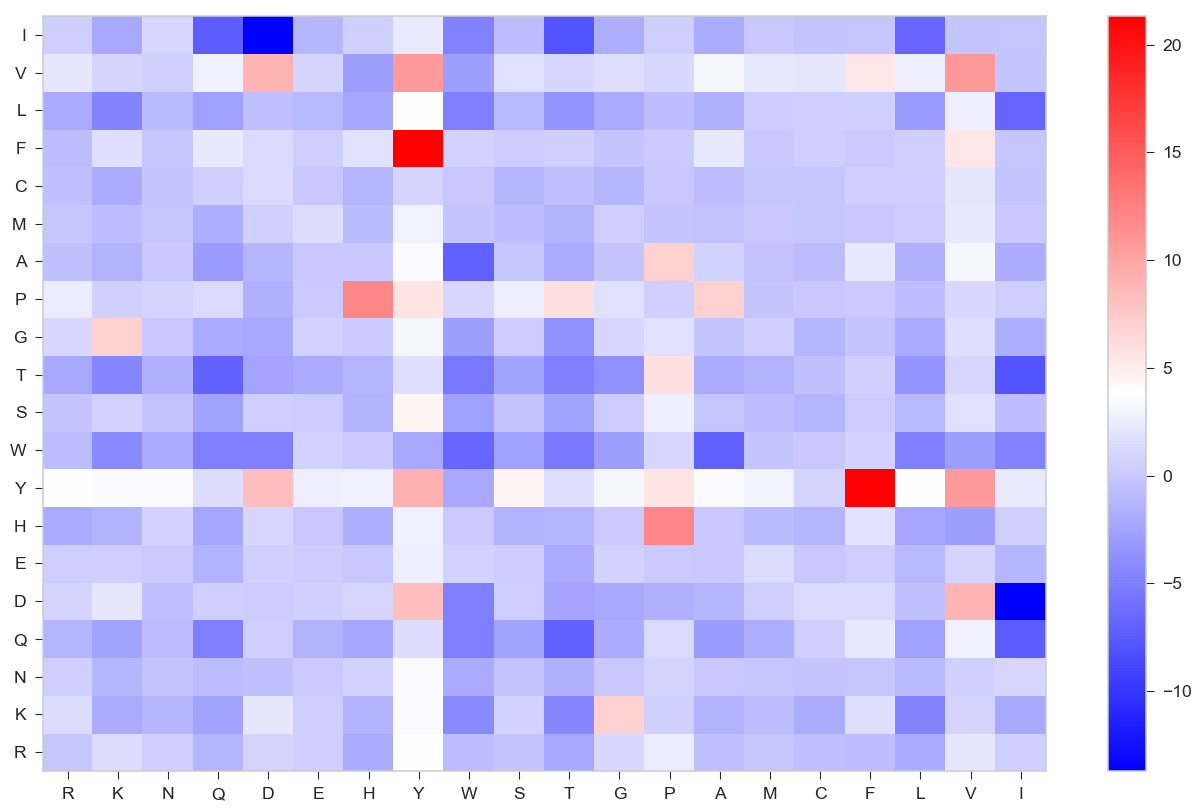

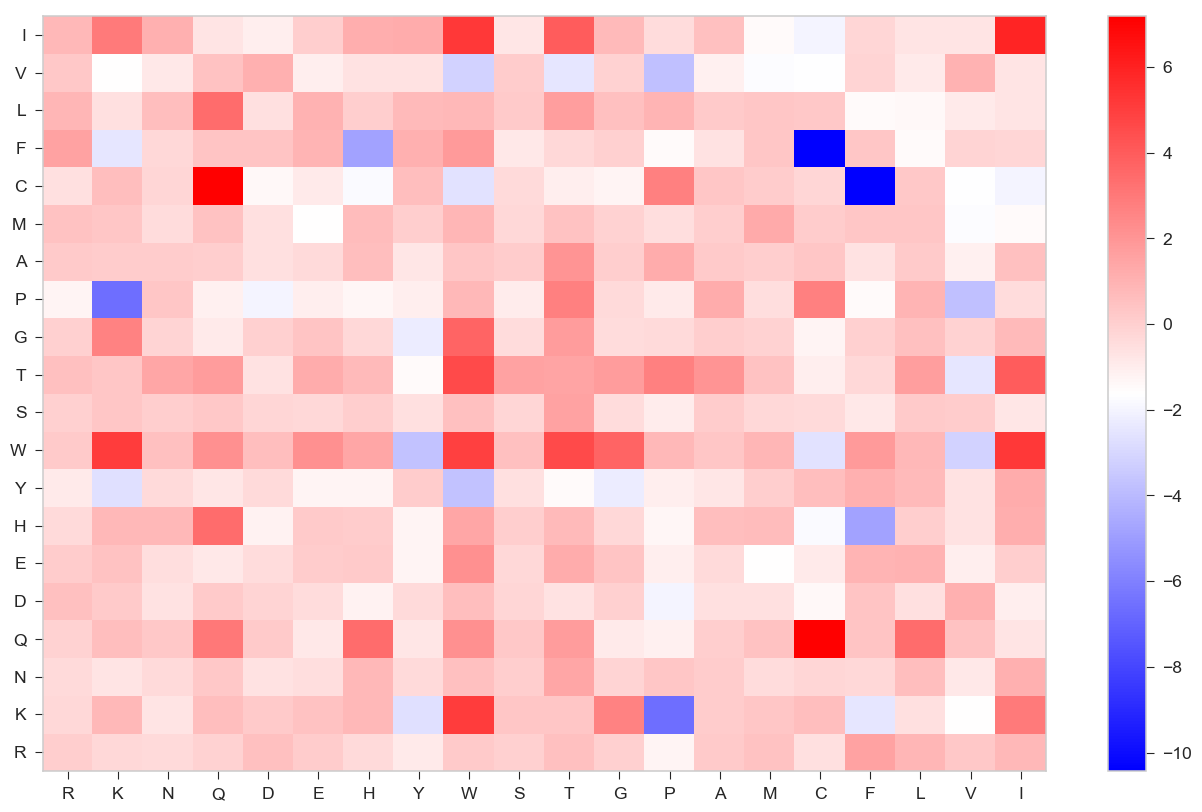

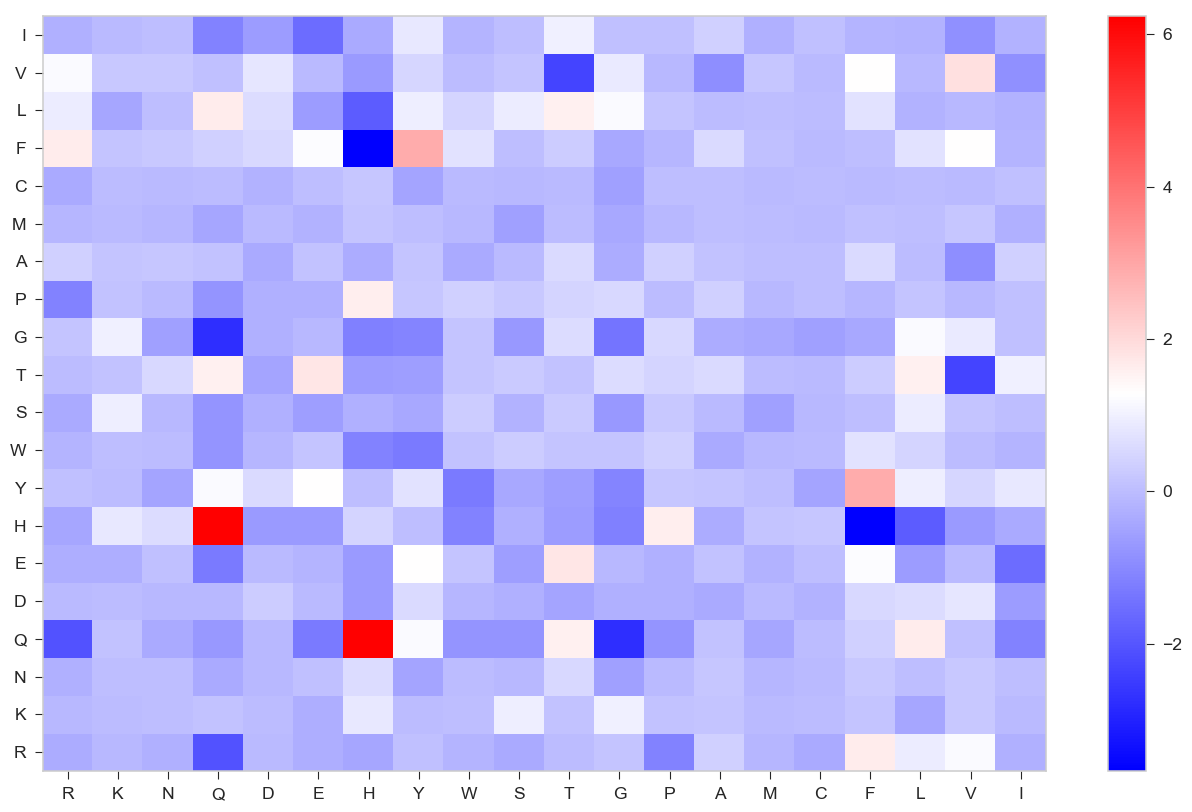

In [21]:
plot_contact_well(filtered_gamma[:210], inferBound=True)
plot_contact_well(filtered_gamma[210:420], inferBound=True)
plot_contact_well(filtered_gamma[420:], inferBound=True)

In [22]:
# impose A'gamma
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/saved_gammas/"
np.savetxt(f"{save_gamma_pre}/trial_2_cutoff400_impose_Aprime_constraint", gamma_new)

In [23]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_2_cutoff400_impose_Aprime_constraint"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_small", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 22.073925622758694
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2_1,22.073926,-846.030533,-438.667301,18.454499
1,6BJ8_1,18.269852,-1004.324453,-607.371078,21.727235
2,2JCC_1,23.133333,-1026.405787,-641.641369,16.632468
3,1AO7_1,21.629690,-971.717108,-586.869112,17.792580
4,1LP9_1,22.944863,-936.668865,-567.127738,16.105615
5,3QDJ_1,19.845226,-1007.446393,-588.950991,21.087964
6,3GSN_1,22.129463,-837.829729,-487.799204,15.817398
7,1QRN_1,27.795110,-1026.020277,-627.234270,14.347344
8,3PWP_1,27.632642,-1032.733486,-632.118083,14.497904
9,5W1W_1,20.072665,-856.575032,-448.143370,20.347655


In [26]:
# mix gammas so that we don't overfitting too much.
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/original_gamma"
original_gamma = np.loadtxt(gamma_file_name)
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_2_cutoff400_impose_Aprime_constraint"
gamma_new = np.loadtxt(gamma_file_name)

alpha = 0.9
alpha_percent = int(alpha*100)
mixed_gamma = alpha*original_gamma + (1-alpha)*gamma_new
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/saved_gammas/"
np.savetxt(f"{save_gamma_pre}/trial_2_mixed_original_and_cutoff400_impose_Aprime_constraint_{alpha_percent}", mixed_gamma)

In [25]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_2_mixed_original_and_cutoff400_impose_Aprime_constraint_90"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_small", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 3.61317979615153
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2_1,3.613180,-579.396917,-552.351354,7.485252
1,6BJ8_1,2.699095,-581.624451,-558.892556,8.422044
2,2JCC_1,2.582660,-601.020701,-580.587160,7.911820
3,1AO7_1,2.728040,-575.724580,-551.600588,8.842975
4,1LP9_1,2.213663,-590.667403,-572.036213,8.416452
5,3QDJ_1,3.590370,-571.765944,-546.880369,6.931201
6,3GSN_1,2.660365,-560.869135,-536.903557,9.008381
7,1QRN_1,2.839146,-578.898224,-558.679917,7.121263
8,3PWP_1,2.654854,-594.012756,-571.886119,8.334407
9,5W1W_1,3.460066,-578.070487,-552.034760,7.524634


In [27]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_2_mixed_original_and_cutoff400_impose_Aprime_constraint_90"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_small", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 6.4585874724654575
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2_1,6.458587,-593.430265,-546.367982,7.286776
1,6BJ8_1,5.247254,-603.871820,-561.444057,8.085708
2,2JCC_1,5.202229,-623.409390,-583.800540,7.613823
3,1AO7_1,5.109089,-596.566292,-553.456826,8.437798
4,1LP9_1,4.668548,-608.878006,-571.777872,7.946825
5,3QDJ_1,6.764150,-594.696494,-549.094613,6.741702
6,3GSN_1,4.745268,-575.446008,-534.319118,8.666926
7,1QRN_1,5.841006,-602.430963,-562.288040,6.872604
8,3PWP_1,5.231997,-617.103320,-575.056223,8.036529
9,5W1W_1,6.291112,-592.728621,-546.566792,7.337627
